In [57]:
import pandas as pd
import matplotlib.pyplot as plt

#parametros de plot

from matplotlib.ticker import MultipleLocator


plt.style.use('ggplot')


In [27]:
filtro_enem_2022 = [
    "NU_INSCRICAO", # Identificador único da inscrição
    "TP_ESCOLA",  # Tipo de escola do Ensino Médio (Público, Privado)
    "CO_MUNICIPIO_ESC", #Código de identificação da escola
    "SG_UF_ESC", 
    "TP_DEPENDENCIA_ADM_ESC", 
    "NU_NOTA_CN", 
    "NU_NOTA_CH", 
    "NU_NOTA_LC", 
    "NU_NOTA_MT", 
    "NU_NOTA_REDACAO", 
    "Q006", 
    "Q024", 
    "Q025"]

In [29]:
filtro_aed_enem = [
    "NU_INSCRICAO", # Identificador único da inscrição
    "TP_FAIXA_ETARIA", # Faixa etária do participante
    "TP_SEXO", # Sexo do participante
    "TP_COR_RACA", # Cor/raça do participante
    "TP_NACIONALIDADE", # Nacionalidade do participante
    "TP_ESCOLA",  # Tipo de escola do Ensino Médio (Público, Privado)
    "TP_ENSINO", #Ensino médio ou especial
    "IN_TREINEIRO", # Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
    "CO_MUNICIPIO_ESC", #Código de identificação da escola
    "SG_UF_ESC",  # Sigla da Unidade da Federação da escola
    "TP_DEPENDENCIA_ADM_ESC", #Dependência administrativa
    "TP_LOCALIZACAO_ESC", #localização da escola
    "NU_NOTA_CN", #nota da prova de Ciências da Natureza
    "NU_NOTA_CH", #nota da prova de Ciências Humanas
    "NU_NOTA_LC", #nota da prova de Linguagens e Códigos
    "NU_NOTA_MT", #nota da prova de Matemática
    "NU_NOTA_REDACAO", #nota da prova de Redação
    "Q001", #educação do pai
    "Q002", #educação da mãe
    "Q006", #renda familiar
    "Q024", #possui computador em casas
    "Q025" #possui internet em casa
    ]

In [39]:
enem = pd.read_csv('dados/MICRODADOS_ENEM_2022.csv', usecols=filtro_aed_enem, sep=';', encoding='latin1')

In [40]:
#média das notas
enem['MEDIA'] = (enem['NU_NOTA_CN'] + enem['NU_NOTA_CH'] + enem['NU_NOTA_LC'] + enem['NU_NOTA_MT'] + enem['NU_NOTA_REDACAO']) / 5

In [41]:
dict_faixa_etaria = {
1:"Menor de 17 anos",
2:"17 anos",
3:"18 anos",
4:"19 anos",
5:"20 anos",
6:"21 anos",
7:"22 anos",
8:"23 anos",
9:"24 anos",
10:"25 anos",
11:"Entre 26 e 30 anos",
12:"Entre 31 e 35 anos",
13:"Entre 36 e 40 anos",
14:"Entre 41 e 45 anos",
15:"Entre 46 e 50 anos",
16:"Entre 51 e 55 anos",
17:"Entre 56 e 60 anos",
18:"Entre 61 e 65 anos",
19:"Entre 66 e 70 anos",
20:"Maior de 70 anos"
}

In [42]:
enem['TP_FAIXA_ETARIA_LABEL'] = enem['TP_FAIXA_ETARIA'].map(dict_faixa_etaria)

#transformar TP_FAIXA_ETARIA em categórica

enem['TP_FAIXA_ETARIA_LABEL'] = pd.Categorical(enem['TP_FAIXA_ETARIA_LABEL'], categories=dict_faixa_etaria.values(), ordered=True)

Faixa etária

<Axes: xlabel='Quantidade', ylabel='Faixa etária'>

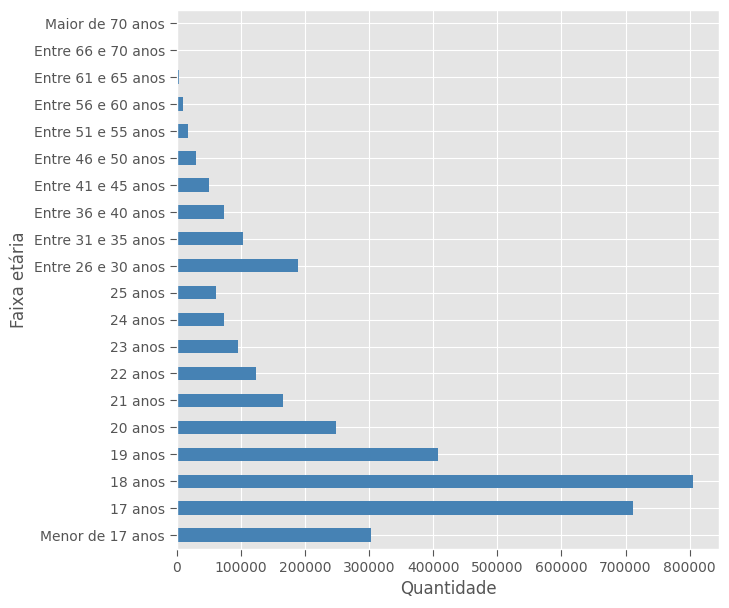

In [84]:
enem['TP_FAIXA_ETARIA_LABEL'].value_counts().sort_index().plot.barh(figsize=(7,7), color='steelblue', ylabel='Faixa etária', xlabel='Quantidade')

In [88]:
enem[['TP_FAIXA_ETARIA_LABEL']].value_counts().sort_index()

TP_FAIXA_ETARIA_LABEL
Menor de 17 anos         303605
17 anos                  711278
18 anos                  805862
19 anos                  408115
20 anos                  247679
21 anos                  165982
22 anos                  123260
23 anos                   94849
24 anos                   73338
25 anos                   61564
Entre 26 e 30 anos       189700
Entre 31 e 35 anos       103634
Entre 36 e 40 anos        74162
Entre 41 e 45 anos        49735
Entre 46 e 50 anos        30066
Entre 51 e 55 anos        17688
Entre 56 e 60 anos         9688
Entre 61 e 65 anos         3817
Entre 66 e 70 anos         1505
Maior de 70 anos            578
Name: count, dtype: int64

Sexo

In [120]:
enem['TP_SEXO'].value_counts() 

TP_SEXO
F    2120519
M    1355586
Name: count, dtype: int64

In [105]:
round(enem['TP_SEXO'].value_counts() / enem['TP_SEXO'].value_counts().sum() * 100, 3)

TP_SEXO
F    61.003
M    38.997
Name: count, dtype: float64

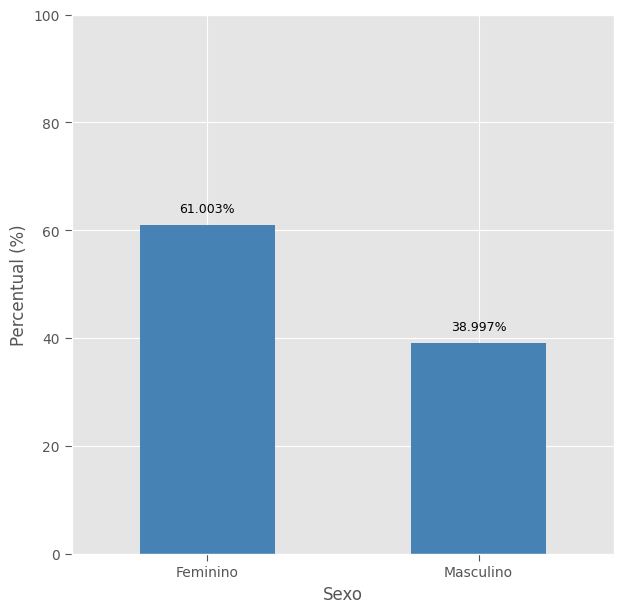

In [119]:
fig, ax = plt.subplots(figsize=(7,7))

#gráfico de barras para tp_sexo

round(enem['TP_SEXO'].value_counts() / enem['TP_SEXO'].value_counts().sum() * 100, 3).plot.bar(ax=ax, color='steelblue', ylabel='Percentual (%)', xlabel='Sexo')

#configurações do gráfico

ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0)

ax.set_ylim(0, 100)

#anotações

for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5), ha='center', va='center', fontsize=9, xytext=(0,10), textcoords='offset points', color='black')

plt.show()

Candidatos por Região

In [188]:
candidatos_estados = pd.DataFrame(enem['SG_UF_ESC'].value_counts()).reset_index()

In [193]:
candidatos_estados['percentual'] = candidatos_estados['count'] / candidatos_estados['count'].sum() * 100

In [194]:
candidatos_estados

,SG_UF_ESC,count,percentual
0,SP,184295,19.359857
1,CE,102972,10.817023
2,MG,68869,7.234564
3,RJ,68435,7.188973
4,PR,50307,5.284660
5,GO,47563,4.996407
6,BA,44483,4.672859
7,PE,43562,4.576110
8,RS,41842,4.395427
9,PA,34897,3.665867


In [163]:
import geobr

In [195]:
states = geobr.read_state(year=2019)

In [196]:
states = states.merge(candidatos_estados, how="left", left_on="abbrev_state", right_on="SG_UF_ESC")

In [205]:
candidatos_estados

,SG_UF_ESC,count,percentual
0,SP,184295,19.359857
1,CE,102972,10.817023
2,MG,68869,7.234564
3,RJ,68435,7.188973
4,PR,50307,5.284660
5,GO,47563,4.996407
6,BA,44483,4.672859
7,PE,43562,4.576110
8,RS,41842,4.395427
9,PA,34897,3.665867


/home/matheus/miniconda3/envs/hipoteses/lib/python3.11/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/matheus/miniconda3/envs/hipoteses/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/matheus/miniconda3/envs/hipoteses/lib/python3.11/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

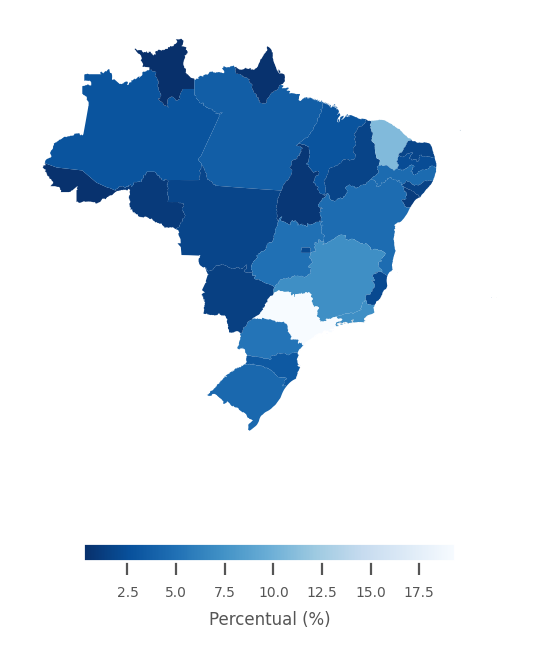

In [204]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

states.plot(
    column="percentual",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Percentual (%)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.axis("off")

In [208]:
enem.shape

(3476105, 24)

MEDIA ENEM

In [263]:
1000/20

50.0

<Axes: xlabel='Média', ylabel='Quantidade'>

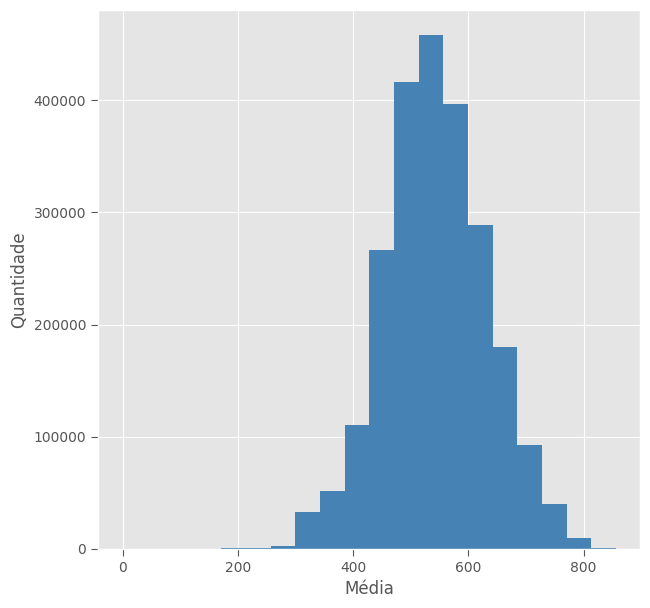

In [264]:
#distribuição das médias

enem['MEDIA'].plot.hist(bins=20, figsize=(7,7), color='steelblue', xlabel='Média', ylabel='Quantidade')


In [266]:
import seaborn as sns

In [278]:
sns.set(style=None)
#df = sns.load_dataset("iris")

In [243]:
print(f"Contagem : {enem['MEDIA'].count()}")
print(f"Média : {enem['MEDIA'].mean()}")
print(f"desvio : {enem['MEDIA'].std()}")
print(f"mínimo : {enem['MEDIA'].min()}")
print(f"1 quartil : {enem['MEDIA'].quantile(0.25)}")
print(f"mediana ou 2quartil : {enem['MEDIA'].quantile(0.50)}")
print(f"3 quartil : {enem['MEDIA'].quantile(0.75)}")
print(f"máximo : {enem['MEDIA'].max()}")



Contagem : 2344823
Média : 543.4847086539154
desvio : 88.04023039439858
mínimo : 0.0
1 quartil : 484.52
mediana ou 2quartil : 540.5400000000001
3 quartil : 602.06
máximo : 855.9799999999999
